creating new dataset

In [184]:
import os
import numpy as np
import cv2
from PIL import Image
from tensorflow import keras
import tensorflow as tf

In [185]:
image_folder = 'dataset'
image_files = os.listdir(image_folder)
common_size = (28, 28)
image_array_list = []
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    pil_image = Image.open(image_path)
    pil_image_resized = pil_image.resize(common_size)
    image_array = np.array(pil_image_resized)
    image_array_list.append(image_array)

In [186]:
X = np.array(image_array_list)
X1 = []

In [187]:
for i in X:
    img = i
    pil_image_resized = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    X1.append(pil_image_resized)

In [188]:
X = np.array(X1)
X.shape

(9008, 28, 28)

In [189]:
Y = []

for i in range(595):
    Y.append(0)

for i in range(562):
    Y.append(1)

for i in range(433):
    Y.append(2)

for i in range(541):
    Y.append(3)

for i in range(526):
    Y.append(4)

for i in range(433):
    Y.append(5)

for i in range(581):
    Y.append(6)

for i in range(533):
    Y.append(7)

for i in range(554):
    Y.append(8)

for i in range(546):
    Y.append(9)

for i in range(596):
    Y.append(10)  # +

for i in range(618):
    Y.append(11)  # /

for i in range(624):
    Y.append(12)   # .

for i in range(634):
    Y.append(13)   #  =

for i in range(577):
    Y.append(14)   #  *

for i in range(655):
    Y.append(15)   #  -


In [190]:
Y = np.array(Y)

just shuffle them to select 4 params

In [191]:
length = len(X)

random_indices = np.random.permutation(length)

X = X[random_indices]
Y = Y[random_indices]

split data

In [192]:
x_train, x_test, y_train, y_test = X[:8000], X[8000:], Y[:8000], Y[8000:]

In [193]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape 

((8000, 28, 28), (1008, 28, 28), (8000,), (1008,))

In [194]:
old_model = keras.models.load_model('MODEL.h5')

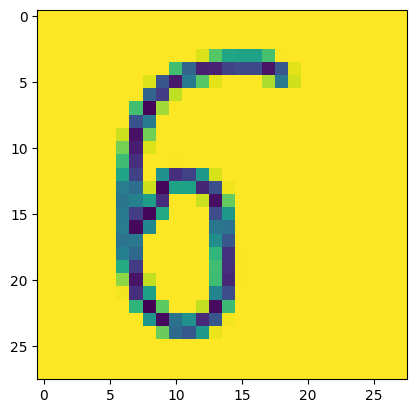

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.imshow(x_train[50])
plt.show()

In [196]:
y_train[50]

6

In [197]:
print(np.unique(y_train))
print(np.unique(y_test))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [198]:
x_train = x_train / 255
x_test = x_test / 255

make model of NN

In [199]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    old_model.layers[1],
    old_model.layers[2],
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(16, activation='sigmoid')
])

In [200]:
# for layer in model.layers[:2]:
#     layer.trainable = False

In [201]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [202]:
for layer in model.layers[:2]:
    layer.trainable = False

In [203]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50


250/250 [==============================] - 1s 2ms/step - loss: 2.5822 - accuracy: 0.2164
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2.0323 - accuracy: 0.3641
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 1.8013 - accuracy: 0.4313
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 1.6275 - accuracy: 0.4924
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 1.5193 - accuracy: 0.5195
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 1.4313 - accuracy: 0.5501
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1.3336 - accuracy: 0.5878
Epoch 8/50
250/250 [==============================] - 1s 4ms/step - loss: 1.2693 - accuracy: 0.5951
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1.2077 - accuracy: 0.6136
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1.1353 - accuracy: 0.6410
Epoch 11/5

accuracy is 84.75%

In [204]:
loss, accuracy = model.evaluate(x_test, y_test)
print(loss, accuracy)

32/32 [==============================] - 0s 1ms/step - loss: 0.8215 - accuracy: 0.7599
0.8214592337608337 0.7599206566810608


accuracy is 76% on test data

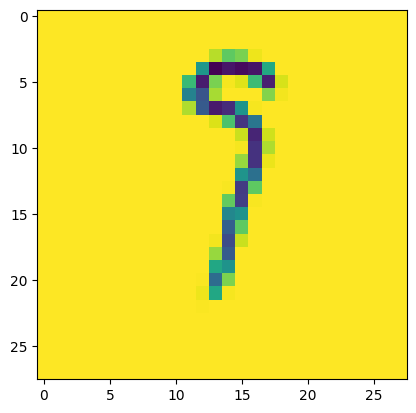

In [205]:
plt.imshow(x_test[10])

In [206]:
y_pred = model.predict(x_test)

32/32 [==============================] - 0s 1ms/step


In [207]:
print(np.argmax(y_pred[10]))

9


In [208]:
y_pred_label = [np.argmax(i) for i in y_pred]
print(y_pred_label)

[15, 4, 1, 6, 14, 12, 3, 15, 15, 11, 9, 9, 15, 9, 11, 10, 12, 14, 8, 2, 13, 9, 9, 9, 8, 13, 11, 14, 1, 8, 5, 12, 8, 3, 8, 5, 14, 3, 2, 12, 0, 9, 12, 9, 7, 5, 14, 12, 1, 3, 8, 1, 12, 3, 8, 7, 6, 5, 5, 1, 4, 2, 14, 4, 6, 11, 14, 0, 12, 5, 7, 14, 1, 10, 1, 2, 2, 8, 1, 12, 13, 7, 6, 5, 5, 0, 10, 11, 5, 3, 1, 4, 1, 12, 15, 14, 0, 9, 0, 2, 0, 12, 12, 3, 7, 14, 1, 3, 14, 10, 6, 3, 1, 7, 13, 12, 15, 10, 13, 4, 0, 5, 2, 8, 4, 4, 15, 12, 12, 4, 7, 9, 8, 1, 1, 12, 9, 12, 11, 0, 1, 13, 1, 5, 1, 2, 8, 9, 4, 6, 13, 14, 8, 15, 12, 8, 3, 8, 10, 15, 11, 8, 10, 0, 8, 9, 10, 14, 11, 9, 10, 7, 12, 5, 13, 15, 15, 12, 13, 15, 8, 5, 10, 15, 7, 11, 0, 13, 5, 1, 4, 6, 1, 7, 11, 8, 9, 12, 0, 13, 9, 2, 13, 0, 5, 8, 7, 4, 1, 8, 14, 14, 8, 12, 5, 3, 0, 14, 0, 3, 12, 14, 12, 15, 4, 10, 1, 6, 12, 13, 14, 15, 14, 14, 2, 15, 8, 12, 0, 3, 15, 5, 1, 13, 5, 1, 14, 8, 5, 13, 14, 2, 12, 5, 5, 9, 14, 1, 13, 8, 5, 13, 3, 2, 11, 0, 10, 9, 14, 14, 8, 9, 14, 4, 3, 7, 0, 6, 2, 8, 11, 5, 14, 13, 2, 1, 12, 11, 9, 12, 0, 2, 1, 3, 1

In [209]:
con_mat = tf.math.confusion_matrix(y_test, y_pred_label)

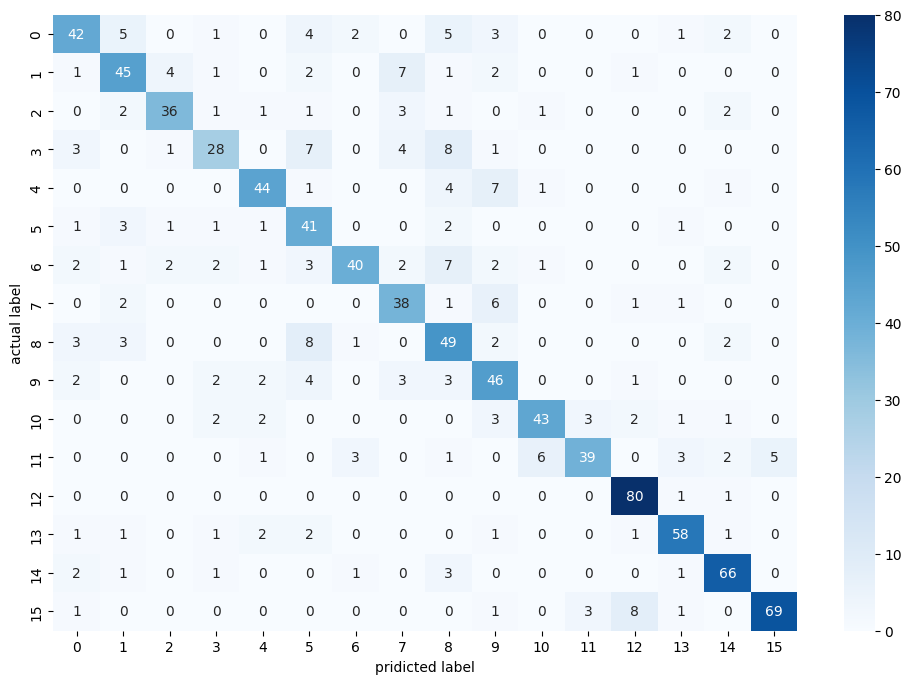

In [210]:
plt.figure(figsize=(12,8))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('pridicted label')
plt.ylabel('actual label')
plt.show()

system

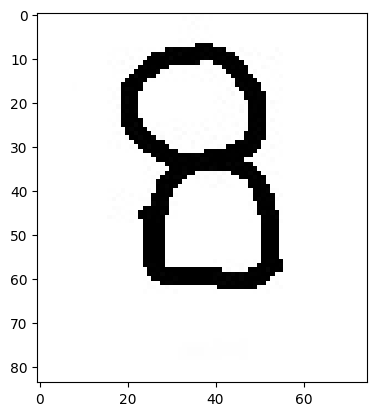

1/1 [==============================] - 0s 65ms/step
The Handwritten Digit is recognised as 8 of a.jpg


In [264]:
def predict():
    input_image_path = input("Enter file name: ")

    input_image = cv2.imread(input_image_path)

    plt.imshow(input_image)
    plt.show()

    grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

    input_image_resize = cv2.resize(grayscale, (28, 28))

    input_image_resize = input_image_resize/255

    image_reshaped = np.reshape(input_image_resize, [1,28,28])

    input_prediction = model.predict(image_reshaped)

    input_pred_label = np.argmax(input_prediction)

    print('The Handwritten Digit is recognised as', input_pred_label, "of", input_image_path)

predict()

In [212]:
# 10 - >     +
# 11 - >     /
# 12 - >     .
# 13 - >     =
# 14 - >     X
# 15 - >     -

model saving


In [265]:
keras.models.save_model(model, 'fine_tuned.h5')

C:\Users\samee\AppData\Local\Temp\ipykernel_8032\2425931340.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  keras.models.save_model(model, 'fine_tuned.h5')
